In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('veriler1.csv')
df2 = pd.read_csv('veriler2.csv')
df1.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
df2.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [4]:
df = pd.concat([df1,df2])
df.to_csv('olimpiyat.csv',index=False)

In [5]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1.0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,NaN,NaN
1,2.0,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,NaN,NaN
2,3.0,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920.0,Summer,Antwerpen,Football,Football Men's Football,NaN,NaN,NaN
3,4.0,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,NaN,NaN
4,5.0,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271346 entries, 0 to 229
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  float64
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271346 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  float64
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  227 non-null     object 
 16  notes   21 non-null      object 
dtypes: float64(5), object(12)
memory usage: 37.3+ MB


In [7]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

In [8]:
df.rename(columns={'ID'    : 'id',
                     'Name'  : 'isim',
                     'Sex'   : 'cinsiyet',
                     'Age'   : 'yas',
                     'Height': 'boy',
                     'Weight': 'kilo',
                     'Team'  : 'takim',
                     'NOC'   : 'uok',
                     'Games' : 'oyunlar',
                     'Year'  : 'yil',
                     'Season': 'sezon',
                     'City'  : 'sehir',
                     'Sport' : 'spor',
                     'Event' : 'etkinlik',
                     'Medal' : 'madalya',
                     'region': 'ülke',
                     'notes' : 'notlar'}, inplace=True)
df.head(3)

,id,isim,cinsiyet,yas,boy,kilo,takim,uok,oyunlar,yil,sezon,sehir,spor,etkinlik,madalya,ülke,notlar
0,1.0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,NaN,NaN
1,2.0,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,NaN,NaN
2,3.0,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920.0,Summer,Antwerpen,Football,Football Men's Football,NaN,NaN,NaN


In [9]:
veri = df.drop(['id','oyunlar','ülke','notlar'], axis=1)
veri.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920.0,Summer,Antwerpen,Football,Football Men's Football,NaN


In [10]:
essiz_etkinlik = pd.unique(veri.etkinlik)
print("Eşsiz etkinlik sayısı :{}".format(len(essiz_etkinlik)) )
essiz_etkinlik[:10]

Eşsiz etkinlik sayısı :766


array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay"], dtype=object)

In [11]:
#etkinlik üzerinde boy ve kilo ortalamalarını hesapla
#kayıp boy ve kilo değelerini etkinlik ortalamarı
veri_gecici = veri.copy()
boy_kilo_liste = ['boy','kilo']

for e in essiz_etkinlik:
    #etkinlik filtresi oluşturma
    etkinlik_filtre = veri_gecici.etkinlik == e
    #veriyi etkinliğe göre filrele
    veri_filtreli = veri_gecici[etkinlik_filtre]
    #boy ve kilo için etkinlik özelinde ortalamaları hesapla
    for s in boy_kilo_liste:
        ortalama = np.round(np.mean(veri_filtreli[s]),2)
        if ~np.isnan(ortalama): #eğer etkinlik özelinde ortalama varsa
            veri_filtreli[s] = veri_filtreli[s].fillna(ortalama)
        else: #eğer etkinlik özelinde ortalama varsa ortalamayı hesapla
            tum_veri_ortalamasi = np.round(np.mean(veri[s]),2)
            veri_filtreli[s] = veri_filtreli[s].fillna(tum_veri_ortalamasi)
    #etkinlik özelinde kayıp değerleri doldurulmuş olan veriyi veri_geçici'ye
    veri_gecici[etkinlik_filtre] = veri_filtreli
#kayıp değerleri giderilmiş olan geçici veriyi gerçek veriye eşitle
veri = veri_gecici.copy()
veri.info() #boy ve kilo sütunlarında kayıp değer sayısına bakalım

<class 'pandas.core.frame.DataFrame'>
Index: 271346 entries, 0 to 229
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   isim      271116 non-null  object 
 1   cinsiyet  271116 non-null  object 
 2   yas       261642 non-null  float64
 3   boy       271116 non-null  float64
 4   kilo      271116 non-null  float64
 5   takim     271116 non-null  object 
 6   uok       271346 non-null  object 
 7   yil       271116 non-null  float64
 8   sezon     271116 non-null  object 
 9   sehir     271116 non-null  object 
 10  spor      271116 non-null  object 
 11  etkinlik  271116 non-null  object 
 12  madalya   39783 non-null   object 
dtypes: float64(4), object(9)
memory usage: 29.0+ MB


In [12]:
#yas değişkeninde tanımlı olmayan değerleri bulma
yas_ortalamasi = np.round(np.mean(veri.yas),2)
print('Yaş ortalaması: {}'.format(yas_ortalamasi))
veri['yas'] = veri['yas'].fillna(yas_ortalamasi)
veri.info()

Yaş ortalaması: 25.56
<class 'pandas.core.frame.DataFrame'>
Index: 271346 entries, 0 to 229
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   isim      271116 non-null  object 
 1   cinsiyet  271116 non-null  object 
 2   yas       271346 non-null  float64
 3   boy       271116 non-null  float64
 4   kilo      271116 non-null  float64
 5   takim     271116 non-null  object 
 6   uok       271346 non-null  object 
 7   yil       271116 non-null  float64
 8   sezon     271116 non-null  object 
 9   sehir     271116 non-null  object 
 10  spor      271116 non-null  object 
 11  etkinlik  271116 non-null  object 
 12  madalya   39783 non-null   object 
dtypes: float64(4), object(9)
memory usage: 29.0+ MB


In [13]:
#madalya alamayanları çıkar
madalya_degiskeni = veri["madalya"]
pd.isnull(madalya_degiskeni).sum()

231563

In [14]:
madalya_degiskeni_filtesi = ~pd.isnull(madalya_degiskeni)

In [15]:
veri = veri[madalya_degiskeni_filtesi]
veri.head(5)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920.0,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920.0,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014.0,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948.0,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [16]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39783 entries, 3 to 271103
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   isim      39783 non-null  object 
 1   cinsiyet  39783 non-null  object 
 2   yas       39783 non-null  float64
 3   boy       39783 non-null  float64
 4   kilo      39783 non-null  float64
 5   takim     39783 non-null  object 
 6   uok       39783 non-null  object 
 7   yil       39783 non-null  float64
 8   sezon     39783 non-null  object 
 9   sehir     39783 non-null  object 
 10  spor      39783 non-null  object 
 11  etkinlik  39783 non-null  object 
 12  madalya   39783 non-null  object 
dtypes: float64(4), object(9)
memory usage: 4.2+ MB


In [17]:
#temizlenmiş veriyi kaydet
veri.to_csv("olimpiyatlar_temizlenmis.csv",index=False)

In [18]:
#histogram gradfikleri
def plotHistogram(degisken):
    """
        Girdi: Değişken/sütun ismi
        Çıktı: İlgili değişkenin histogramı
    """
    plt.figure()
    plt.hist(veri[degisken], bins=85,color="orange")
    plt.xlabel(degisken)
    plt.ylabel("Frekans")
    plt.title("Veri Sıklığı - {}".format(degisken))
    plt.show()

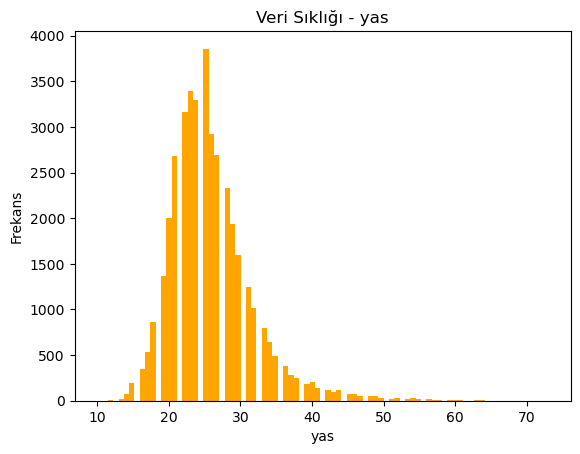

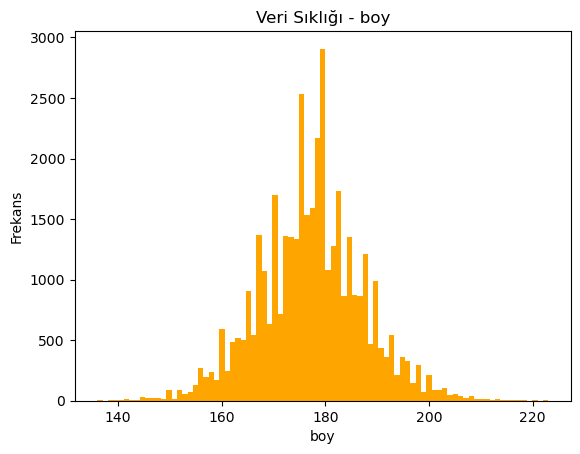

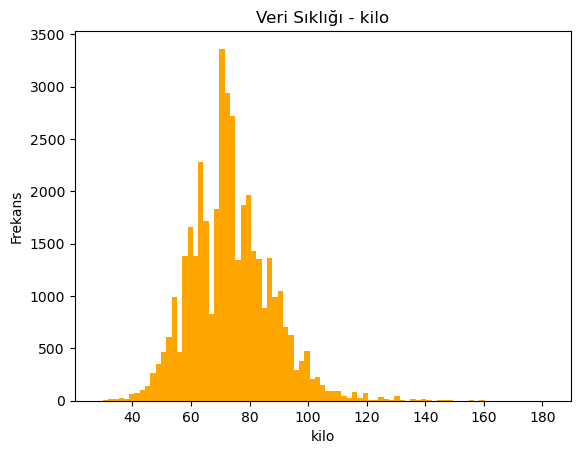

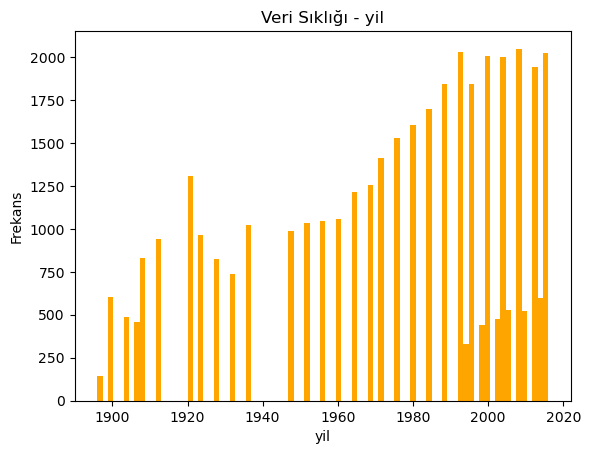

In [19]:
#tüm sayısal değişkenler için histogram çizdir
sayisal_degisken = ["yas","boy","kilo","yil"]
for i in sayisal_degisken:
    plotHistogram(i)

In [20]:
veri.describe()

,yas,boy,kilo,yil
count,39783.000000,39783.000000,39783.000000,39783.000000
mean,25.918456,177.336690,73.738320,1973.943845
std,5.859569,10.170124,13.979041,33.822857
min,10.000000,136.000000,28.000000,1896.000000
25%,22.000000,170.000000,64.000000,1952.000000
50%,25.000000,177.480000,73.000000,1984.000000
75%,29.000000,184.000000,82.000000,2002.000000
max,73.000000,223.000000,182.000000,2016.000000


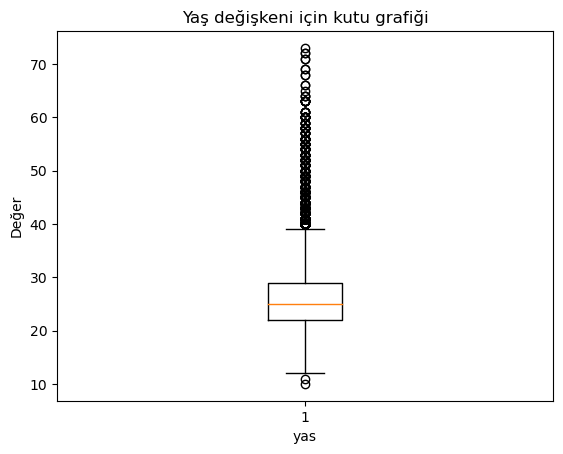

In [21]:
plt.boxplot(veri.yas)
plt.title("Yaş değişkeni için kutu grafiği")
plt.xlabel("yas")
plt.ylabel("Değer")
plt.show()

In [22]:
#çubuk grafiği metodu
def plotBar(degisken, n=5):
    """
        Girdi: Değişken/sütun ismi
                n = Gösterilecek eşsiz değer sayısı
        Çıktı: Çubuk grafiği
    """
    veri_ = veri[degisken]
    veri_sayma = veri_.value_counts()
    veri_sayma = veri_sayma[:n]
    plt.figure()
    plt.bar(veri_sayma.index, veri_sayma, color="orange")
    plt.xticks(veri_sayma.index, veri_sayma.index.values)
    plt.xticks(rotation=45)
    plt.ylabel("Frekans")
    plt.title("Veri sıklığı - {}".format(degisken))
    plt.show()
    print("{}: \n {}".format(degisken, veri_sayma))

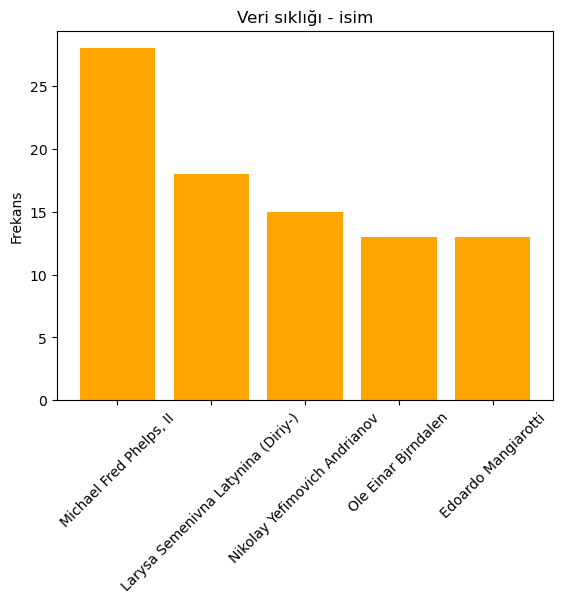

isim: 
 isim
Michael Fred Phelps, II               28
Larysa Semenivna Latynina (Diriy-)    18
Nikolay Yefimovich Andrianov          15
Ole Einar Bjrndalen                   13
Edoardo Mangiarotti                   13
Name: count, dtype: int64


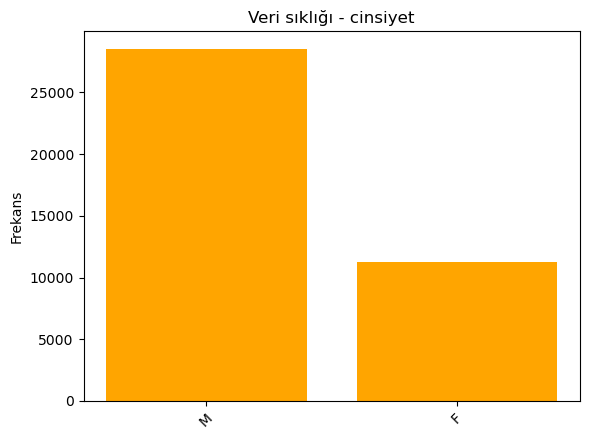

cinsiyet: 
 cinsiyet
M    28530
F    11253
Name: count, dtype: int64


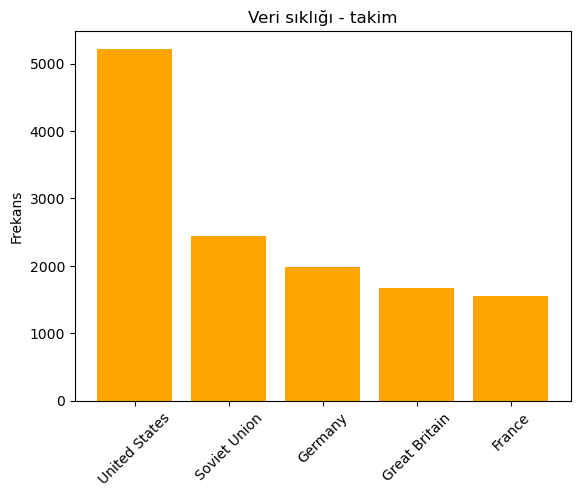

takim: 
 takim
United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Name: count, dtype: int64


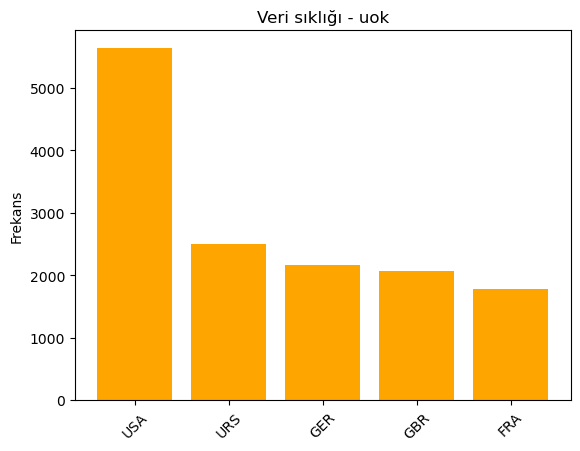

uok: 
 uok
USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
Name: count, dtype: int64


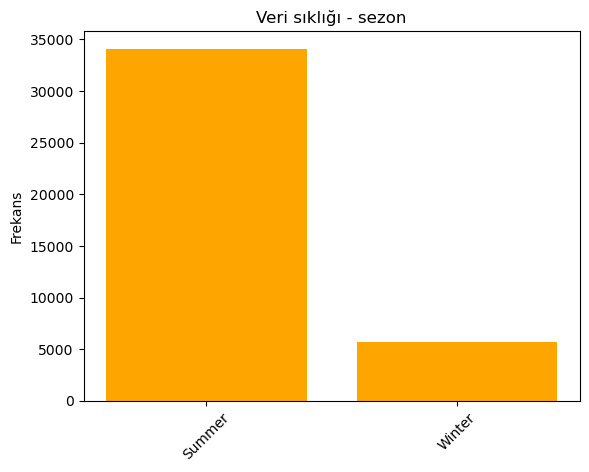

sezon: 
 sezon
Summer    34088
Winter     5695
Name: count, dtype: int64


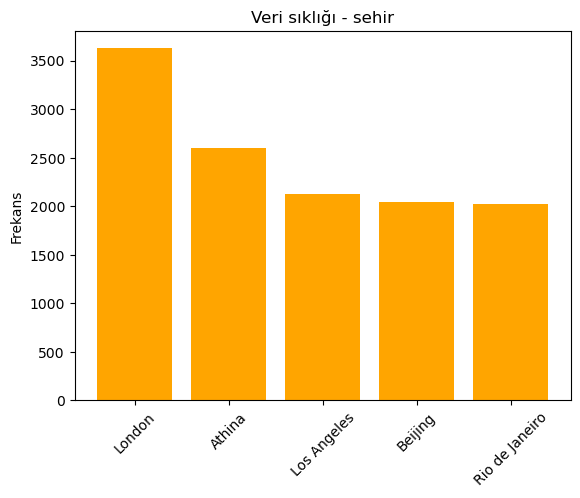

sehir: 
 sehir
London            3624
Athina            2602
Los Angeles       2123
Beijing           2048
Rio de Janeiro    2023
Name: count, dtype: int64


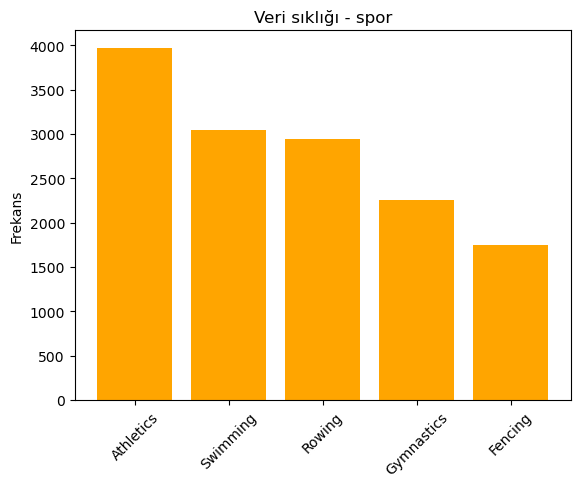

spor: 
 spor
Athletics     3969
Swimming      3048
Rowing        2945
Gymnastics    2256
Fencing       1743
Name: count, dtype: int64


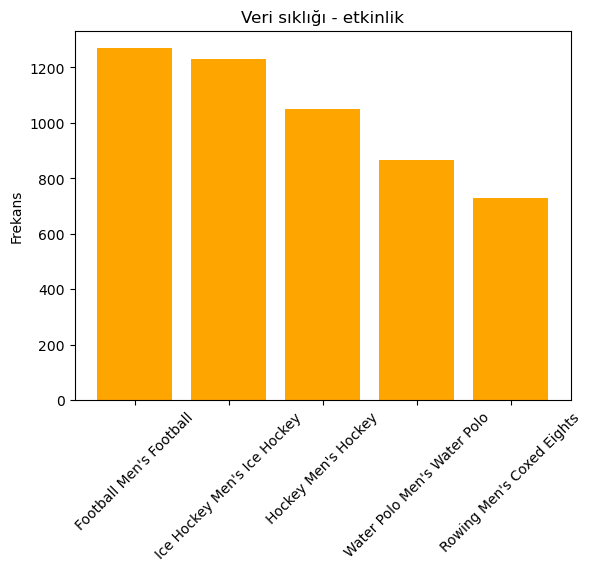

etkinlik: 
 etkinlik
Football Men's Football        1269
Ice Hockey Men's Ice Hockey    1230
Hockey Men's Hockey            1050
Water Polo Men's Water Polo     866
Rowing Men's Coxed Eights       730
Name: count, dtype: int64


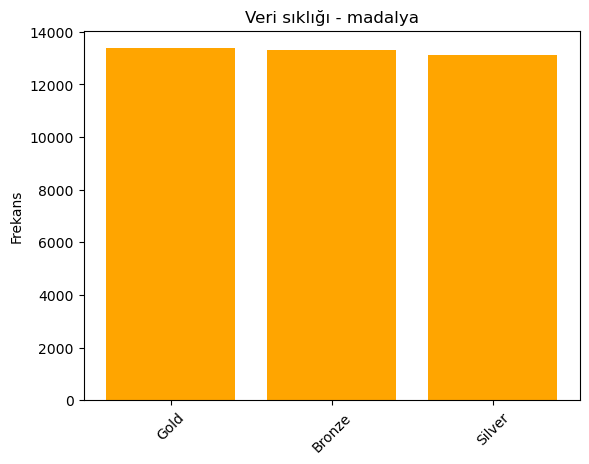

madalya: 
 madalya
Gold      13372
Bronze    13295
Silver    13116
Name: count, dtype: int64


In [23]:
kategorik_degisken = ["isim","cinsiyet","takim","uok","sezon","sehir","spor","etkinlik","madalya"]
for i in kategorik_degisken:
    plotBar(i)

In [24]:
erkek = veri[veri.cinsiyet == "M"]
erkek.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920.0,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920.0,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [25]:
kadin = veri[veri.cinsiyet == "F"]
kadin.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
79,Ragnhild Margrethe Aamodt,F,27.0,163.00,68.88,Norway,NOR,2008.0,Summer,Beijing,Handball,Handball Women's Handball,Gold
91,Willemien Aardenburg,F,22.0,166.13,60.53,Netherlands,NED,1988.0,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
105,Ann Kristin Aarnes,F,23.0,182.00,64.00,Norway,NOR,1996.0,Summer,Atlanta,Football,Football Women's Football,Bronze


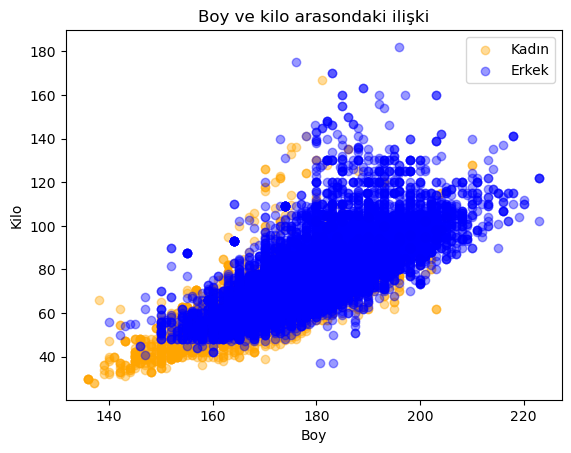

In [26]:
plt.figure()
plt.scatter(kadin.boy, kadin.kilo, alpha=0.4, label="Kadın",color="orange")
plt.scatter(erkek.boy, erkek.kilo, alpha=0.4, label="Erkek", color="blue")
plt.xlabel("Boy")
plt.ylabel("Kilo")
plt.title("Boy ve kilo arasondaki ilişki")
plt.legend()
plt.show()

In [27]:
veri.loc[:,["yas","boy","kilo"]].corr()

,yas,boy,kilo
yas,1.000000,0.061890,0.136349
boy,0.061890,1.000000,0.794368
kilo,0.136349,0.794368,1.000000


In [28]:
#madalyalara göre ayırma
veri_copy = veri.copy()
veri_copy = pd.get_dummies(veri_copy,columns=['madalya'])
veri_copy.head(2)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,False,True,False
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920.0,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,True,False,False


In [29]:
veri_copy.loc[:,["yas","madalya_Bronze","madalya_Gold","madalya_Silver"]].corr()

,yas,madalya_Bronze,madalya_Gold,madalya_Silver
yas,1.000000,-0.005584,-0.002576,0.008192
madalya_Bronze,-0.005584,1.000000,-0.504110,-0.496859
madalya_Gold,-0.002576,-0.504110,1.000000,-0.499022
madalya_Silver,0.008192,-0.496859,-0.499022,1.000000


In [30]:
veri_copy[["takim","madalya_Bronze","madalya_Gold","madalya_Silver"]].groupby(["takim"], as_index=False).sum().sort_values(by="madalya_Gold", ascending=False)[:10]

,takim,madalya_Bronze,madalya_Gold,madalya_Silver
462,United States,1233,2474,1512
403,Soviet Union,677,1058,716
165,Germany,678,679,627
215,Italy,484,535,508
171,Great Britain,572,519,582
149,France,577,455,518
420,Sweden,507,451,476
198,Hungary,365,432,330
67,Canada,408,422,413
117,East Germany,263,369,309


In [31]:
veri_copy[["sehir","madalya_Bronze","madalya_Gold","madalya_Silver"]].groupby(["sehir"], as_index=False).sum().sort_values(by="madalya_Gold", ascending=False)[:10]

,sehir,madalya_Bronze,madalya_Gold,madalya_Silver
17,London,1214,1215,1195
3,Athina,860,883,859
18,Los Angeles,706,726,691
6,Beijing,710,671,667
27,Rio de Janeiro,703,665,655
38,Sydney,680,663,661
4,Atlanta,629,608,605
5,Barcelona,604,559,549
33,Seoul,549,520,513
2,Antwerpen,367,493,448


In [32]:
veri_copy[["cinsiyet","madalya_Bronze","madalya_Gold","madalya_Silver"]].groupby(["cinsiyet"], as_index=False).sum().sort_values(by="madalya_Gold", ascending=False)[:10]

,cinsiyet,madalya_Bronze,madalya_Gold,madalya_Silver
1,M,9524,9625,9381
0,F,3771,3747,3735


In [33]:
veri_pivot = veri.pivot_table(index="madalya",columns="cinsiyet",
                             values=["boy","kilo","yas"],
                             aggfunc={"boy":np.mean, "kilo":np.mean, "yas":[min,max,np.std]})
veri_pivot.head()

boy                   kilo              yas              \
                mean                   mean              max         min   
cinsiyet           F           M          F          M     F     M     F   
madalya                                                                    
Bronze    170.003227  180.045806  62.757125  77.841504  69.0  72.0  12.0   
Gold      170.448727  180.318906  63.199349  78.186505  63.0  64.0  13.0   
Silver    170.233783  180.053626  62.866892  77.960887  55.0  73.0  11.0   

                                    
                     std            
cinsiyet     M         F         M  
madalya                             
Bronze    10.0  5.329229  5.870340  
Gold      13.0  5.219615  5.987807  
Silver    13.0  5.253111  6.098221

In [34]:
def anomaliDetection(df, ozellik):
    outlier_indices = []
    
    for c in ozellik:
        Q1 = np.percentile(df[c],25)
        Q3 = np.percentile(df[c],75)
        #IQR = Inter Quartile Range
        IQR = Q3 - Q1
        #aykırı değer için ek adım miktarı
        outlier_step = 1.5 * IQR
        #aykırı değeri ve bulunduğu indeksi tespit etme
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1)
    return multiple_outliers

In [35]:
veri_anomali = veri.loc[anomaliDetection(veri, ["yas","kilo","boy"])]
veri_anomali.spor.value_counts()

spor
Basketball        64
Gymnastics        34
Handball           6
Athletics          5
Sailing            3
Diving             3
Shooting           1
Figure Skating     1
Wrestling          1
Name: count, dtype: int64

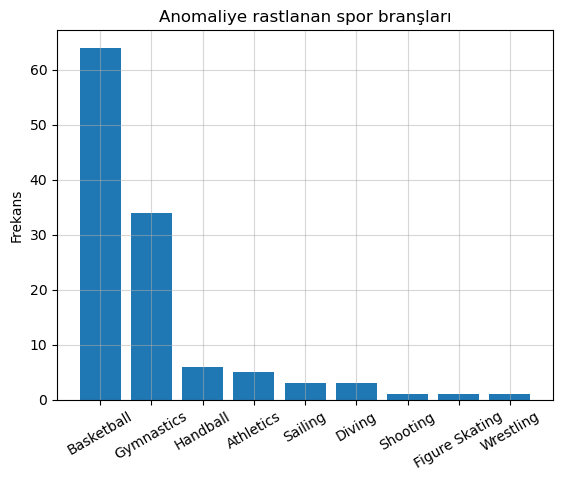

In [36]:
plt.figure()
plt.bar(veri_anomali.spor.value_counts().index, veri_anomali.spor.value_counts().values)
plt.xticks(rotation=30)
plt.title("Anomaliye rastlanan spor branşları")
plt.ylabel("Frekans")
plt.grid(True, alpha=0.5)
plt.show()

In [37]:
veri_gym = veri_anomali[veri_anomali.spor == "Gymnastics"]
veri_gym

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
13741,Oana Mihaela Ban,F,18.0,139.0,36.0,Romania,ROU,2004.0,Summer,Athina,Gymnastics,Gymnastics Women's Team All-Around,Gold
21260,Bi Wenjing,F,14.0,142.0,35.0,China,CHN,1996.0,Summer,Atlanta,Gymnastics,Gymnastics Women's Uneven Bars,Silver
23763,Loredana Boboc,F,16.0,139.0,32.0,Romania,ROU,2000.0,Summer,Sydney,Gymnastics,Gymnastics Women's Team All-Around,Gold
47452,Laura Cutina,F,15.0,143.0,36.0,Romania,ROU,1984.0,Summer,Los Angeles,Gymnastics,Gymnastics Women's Team All-Around,Gold
53751,Deng Linlin,F,16.0,144.0,34.0,China,CHN,2008.0,Summer,Beijing,Gymnastics,Gymnastics Women's Team All-Around,Gold
53759,Deng Linlin,F,20.0,144.0,34.0,China,CHN,2012.0,Summer,London,Gymnastics,Gymnastics Women's Balance Beam,Gold
69216,Mariya Yevgenyevna Filatova (-Kurbatova),F,14.0,136.0,30.0,Soviet Union,URS,1976.0,Summer,Montreal,Gymnastics,Gymnastics Women's Team All-Around,Gold
69222,Mariya Yevgenyevna Filatova (-Kurbatova),F,19.0,136.0,30.0,Soviet Union,URS,1980.0,Summer,Moskva,Gymnastics,Gymnastics Women's Team All-Around,Gold
69225,Mariya Yevgenyevna Filatova (-Kurbatova),F,19.0,136.0,30.0,Soviet Union,URS,1980.0,Summer,Moskva,Gymnastics,Gymnastics Women's Uneven Bars,Bronze
80497,Maxi Gnauck,F,15.0,148.0,33.0,East Germany,GDR,1980.0,Summer,Moskva,Gymnastics,Gymnastics Women's Individual All-Around,Silver


In [38]:
veri_gym.etkinlik.value_counts()

etkinlik
Gymnastics Women's Team All-Around          21
Gymnastics Women's Uneven Bars               6
Gymnastics Women's Balance Beam              3
Gymnastics Women's Floor Exercise            2
Gymnastics Women's Individual All-Around     1
Gymnastics Women's Horse Vault               1
Name: count, dtype: int64

In [39]:
veri_basketbol = veri_anomali[veri_anomali.spor == "Basketball"]
veri_basketbol

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
8834,Franjo Arapovi,M,23.0,211.0,120.0,Yugoslavia,YUG,1988.0,Summer,Seoul,Basketball,Basketball Men's Basketball,Silver
8835,Franjo Arapovi,M,27.0,211.0,120.0,Croatia,CRO,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,Silver
21577,Oleksandr Mykhailovych Bielostienniy,M,21.0,214.0,117.0,Soviet Union,URS,1980.0,Summer,Moskva,Basketball,Basketball Men's Basketball,Bronze
21578,Oleksandr Mykhailovych Bielostienniy,M,29.0,214.0,117.0,Soviet Union,URS,1988.0,Summer,Seoul,Basketball,Basketball Men's Basketball,Gold
25598,"Carlos Austin Boozer, Jr.",M,22.0,206.0,117.0,United States,USA,2004.0,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270119,Rajko ii,M,21.0,210.0,110.0,Yugoslavia,YUG,1976.0,Summer,Montreal,Basketball,Basketball Men's Basketball,Silver
270120,Rajko ii,M,25.0,210.0,110.0,Yugoslavia,YUG,1980.0,Summer,Moskva,Basketball,Basketball Men's Basketball,Gold
270121,Rajko ii,M,29.0,210.0,110.0,Yugoslavia,YUG,1984.0,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Bronze
270740,Eurelijus ukauskas,M,22.0,218.0,115.0,Lithuania,LTU,1996.0,Summer,Atlanta,Basketball,Basketball Men's Basketball,Bronze


In [40]:
veri_basketbol.etkinlik.value_counts()

etkinlik
Basketball Men's Basketball      62
Basketball Women's Basketball     2
Name: count, dtype: int64

In [41]:
veri_zaman = veri.copy()
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920.0,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920.0,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [42]:
essiz_yillar = veri_zaman.yil.unique()
essiz_yillar

array([1900., 1920., 2014., 1948., 1952., 1992., 1994., 2002., 2006.,
       2008., 1988., 1996., 1960., 1912., 1956., 2016., 2012., 2000.,
       2004., 1980., 1984., 1936., 1906., 1964., 1972., 1924., 1904.,
       1932., 1928., 1968., 1976., 2010., 1908., 1998., 1896.])

In [43]:
dizili_array = np.sort(veri_zaman.yil.unique())
dizili_array

array([1896., 1900., 1904., 1906., 1908., 1912., 1920., 1924., 1928.,
       1932., 1936., 1948., 1952., 1956., 1960., 1964., 1968., 1972.,
       1976., 1980., 1984., 1988., 1992., 1994., 1996., 1998., 2000.,
       2002., 2004., 2006., 2008., 2010., 2012., 2014., 2016.])

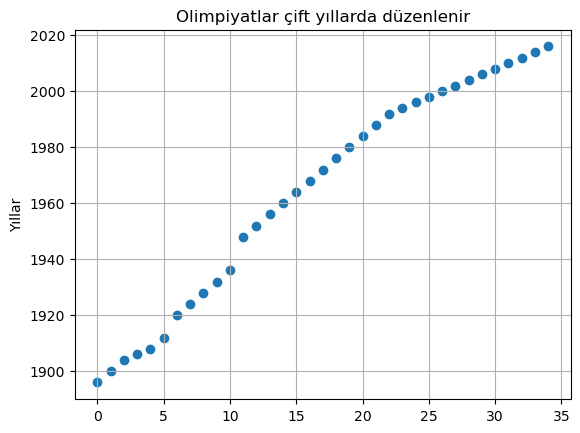

In [44]:
plt.figure()
plt.scatter(range(len(dizili_array)), dizili_array)
plt.grid(True)
plt.ylabel("Yıllar")
plt.title("Olimpiyatlar çift yıllarda düzenlenir")
plt.show()

In [45]:
tarih_saat_nesnesi = pd.to_datetime(veri_zaman["yil"], format='%Y')
print(type(tarih_saat_nesnesi))
tarih_saat_nesnesi.head(3)

<class 'pandas.core.series.Series'>


3    1900-01-01
37   1920-01-01
38   1920-01-01
Name: yil, dtype: datetime64[ns]

In [46]:
veri_zaman["tarih_saat"] = tarih_saat_nesnesi
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya,tarih_saat
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1900-01-01
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920.0,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,1920-01-01
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920.0,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,1920-01-01


In [47]:
veri_zaman = veri_zaman.set_index("tarih_saat")
veri_zaman.drop(["yil"],axis=1, inplace=True)
veri_zaman

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya
tarih_saat,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
1948-01-01,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...
1956-01-01,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.00,80.00,Soviet Union,URS,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
1964-01-01,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.00,80.00,Soviet Union,URS,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
1980-01-01,Bogusaw Zych,M,28.0,182.00,82.00,Poland,POL,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze


In [51]:
veri_zaman.head(5)

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya
tarih_saat,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
1948-01-01,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [53]:
sayisal_sutunlar = veri_zaman.select_dtypes(include=['float64', 'int64'])
periyodik_veri = sayisal_sutunlar.resample("2A").mean()

periyodik_veri

,yas,boy,kilo
tarih_saat,,,
1896-12-31,23.905734,174.280350,72.734056
1898-12-31,NaN,NaN,NaN
1900-12-31,27.786689,177.882301,74.979950
1902-12-31,NaN,NaN,NaN
1904-12-31,26.363868,177.241091,74.330823
...,...,...,...
2008-12-31,26.046875,178.299761,74.263145
2010-12-31,26.723077,175.759615,72.840615
2012-12-31,26.066461,178.305755,73.726399


In [54]:
periyodik_veri.dropna(axis=0, inplace=True)
periyodik_veri.head(5)

,yas,boy,kilo
tarih_saat,,,
1896-12-31,23.905734,174.280350,72.734056
1900-12-31,27.786689,177.882301,74.979950
1904-12-31,26.363868,177.241091,74.330823
1906-12-31,26.479389,176.347576,74.072183
1908-12-31,27.566739,176.662419,73.721107


<Figure size 640x480 with 0 Axes>

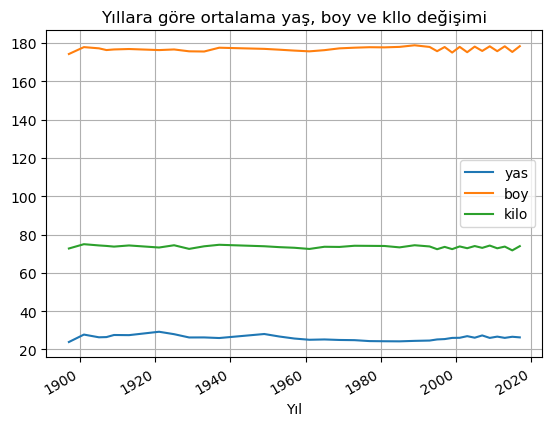

In [55]:
plt.figure()
periyodik_veri.plot()
plt.title("Yıllara göre ortalama yaş, boy ve kllo değişimi")
plt.xlabel("Yıl")
plt.grid(True)
plt.show()

In [82]:
veri_zaman = pd.get_dummies(veri_zaman, columns=["madalya"])
veri_zaman.head(5)

KeyError: "None of [Index(['madalya'], dtype='object')] are in the [columns]"

In [103]:
periyodik_veri = veri_zaman.resample("2A").sum()
periyodik_veri.head()
#kayıp verileri çıkarma
periyodik_veri = periyodik_veri[~(periyodik_veri == 0).any(axis=1)]
periyodik_veri.tail()

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
2008-12-31,Ragnhild Margrethe AamodtJos Luis Abajo GmezMa...,FMFMMMMFMFFMFMMFMMFFMMFMFFMMMMMMMMMMMFMFMMMMFF...,53344.0,365157.91,152090.92,NorwaySpainRussiaBelarusFranceFranceAustraliaU...,NORESPRUSBLRFRAFRAAUSUSATJKTURRUSFRAROUARGCUBN...,SummerSummerSummerSummerSummerSummerSummerSumm...,BeijingBeijingBeijingBeijingBeijingBeijingBeij...,HandballFencingAthleticsCanoeingHandballHandba...,"Handball Women's HandballFencing Men's epee, I...",710,671,667
2010-12-31,"Richard ""Richy"" AdjeiMeghan Christina Agosta ...",MFMMMMFFFFMMFFMFMMMFFFFFMFMFMFFMMFFFFFMMMFFFMM...,13896.0,91395.00,37877.12,Germany-2CanadaSwitzerlandSwitzerlandCanadaGer...,GERCANSUISUICANGERGERFRACANJPNUSAFINUSAFRANORC...,WinterWinterWinterWinterWinterWinterWinterWint...,VancouverVancouverVancouverVancouverVancouverV...,BobsleighIce HockeySki JumpingSki JumpingSnowb...,Bobsleigh Men's TwoIce Hockey Women's Ice Hock...,171,174,175
2012-12-31,Luc AbaloJennifer AbelDenis Mikhaylovich Ablya...,MFMMMMFFFMFFFMMMFFMMMFMMMFMMMMFMFFMMMMFMMMFMFM...,50595.0,346091.47,143102.94,FranceCanadaRussiaRussiaEgyptFranceNetherlands...,FRACANRUSRUSEGYFRANEDGBRNZLGERBRAGBRGBRUSAUSAU...,SummerSummerSummerSummerSummerSummerSummerSumm...,LondonLondonLondonLondonLondonLondonLondonLond...,HandballDivingGymnasticsGymnasticsFencingHandb...,Handball Men's HandballDiving Women's Synchron...,679,632,630
2014-12-31,Juhamatti Tapio AaltonenJeremy AbbottVictoria ...,MMFFMFMMMMMFMMMFMMMMMMMFMFFFFFMMMMFMMMFFFMMMMF...,15907.0,104686.00,42838.63,FinlandUnited StatesGreat BritainCanadaSwedenS...,FINUSAGBRCANSWESUIUSARUSRUSRUSRUSUSAGBRUSARUSC...,WinterWinterWinterWinterWinterWinterWinterWint...,SochiSochiSochiSochiSochiSochiSochiSochiSochiS...,Ice HockeyFigure SkatingCurlingIce HockeyIce H...,Ice Hockey Men's Ice HockeyFigure Skating Mixe...,198,202,197
2016-12-31,Giovanni AbagnalePatimat AbakarovaLuc AbaloSae...,MFMMMMMMMMFFFFMMMMMMFFFMMMFMMMMMFFMFMMFMMMFMFM...,53256.0,360846.03,149628.71,ItalyAzerbaijanFranceIranRussiaRussiaRussiaAus...,ITAAZEFRAIRIRUSRUSRUSAUSESPJORNEDGBRUSANZLUSAU...,SummerSummerSummerSummerSummerSummerSummerSumm...,Rio de JaneiroRio de JaneiroRio de JaneiroRio ...,RowingTaekwondoHandballWrestlingGymnasticsGymn...,Rowing Men's Coxless PairsTaekwondo Women's Fl...,703,665,655


<Figure size 640x480 with 0 Axes>

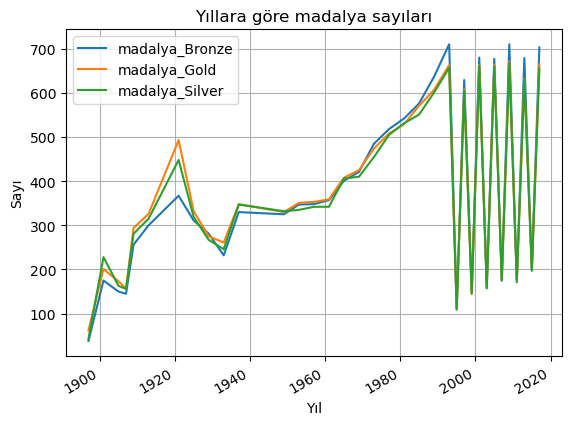

In [95]:
plt.figure()
periyodik_veri.loc[:,["madalya_Bronze","madalya_Gold","madalya_Silver"]].plot()
plt.title("Yıllara göre madalya sayıları")
plt.ylabel("Sayı")
plt.xlabel("Yıl")
plt.grid(True)
plt.show()

In [102]:
yaz = veri_zaman[veri_zaman.sezon == "Summer"]
kis = veri_zaman[veri_zaman.sezon == "Winter"]
kis.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,True,False,False
1992-01-01,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,False,True,False
1992-01-01,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,True,False,False
1994-01-01,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Downhill,False,False,True
1994-01-01,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Super G,True,False,False


In [115]:
boolean_columns = kis.select_dtypes(include=['bool']).columns
kis[boolean_columns] = kis[boolean_columns].astype(int)
selected_columns = ['yas', 'boy','kilo','madalya_Bronze', 'madalya_Gold', 'madalya_Silver']
sayisal_sutunlar = kis[selected_columns]

periyodik_veri_kis = sayisal_sutunlar.resample("A").sum()

# Tüm sütunlarda sıfır olan satırları filtreleme
periyodik_veri_kis = periyodik_veri_kis[~(periyodik_veri_kis == 0).any(axis=1)]

# İlk birkaç satırı gösterme
periyodik_veri_kis.head()

,yas,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,
1924-12-31,3919.60,22867.28,9703.58,37,55,38
1928-12-31,2265.56,15745.75,6862.50,31,30,28
1932-12-31,2431.00,16357.71,7067.76,28,32,32
1936-12-31,2742.00,19123.20,8101.88,35,36,37
1948-12-31,3643.00,23942.51,10375.92,46,41,48


In [113]:
boolean_columns = yaz.select_dtypes(include=['bool']).columns
yaz[boolean_columns] = yaz[boolean_columns].astype(int)
selected_columns = ['yas', 'boy','kilo','madalya_Bronze', 'madalya_Gold', 'madalya_Silver']
sayisal_sutunlar = yaz[selected_columns]

periyodik_veri_yaz = sayisal_sutunlar.resample("A").sum()

# Tüm sütunlarda sıfır olan satırları filtreleme
periyodik_veri_yaz = periyodik_veri_yaz[~(periyodik_veri_yaz == 0).any(axis=1)]

# İlk birkaç satırı gösterme
periyodik_veri_yaz.head()

,yas,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,
1896-12-31,3418.52,24922.09,10400.97,38,62,43
1900-12-31,16783.16,107440.91,45287.89,175,201,228
1904-12-31,12812.84,86139.17,36124.78,150,173,163
1906-12-31,12127.56,80767.19,33925.06,145,157,156
1908-12-31,22907.96,146806.47,61262.24,256,294,281


<Figure size 640x480 with 0 Axes>

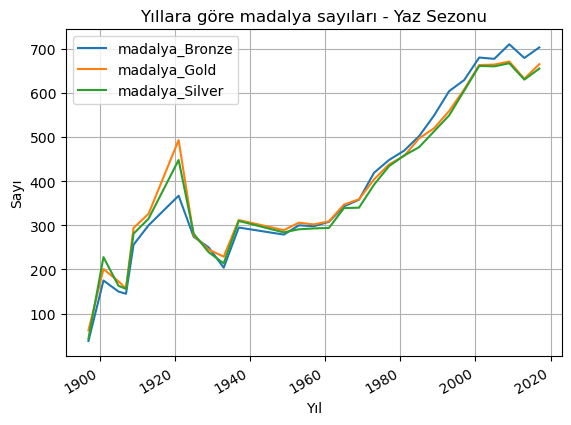

<Figure size 640x480 with 0 Axes>

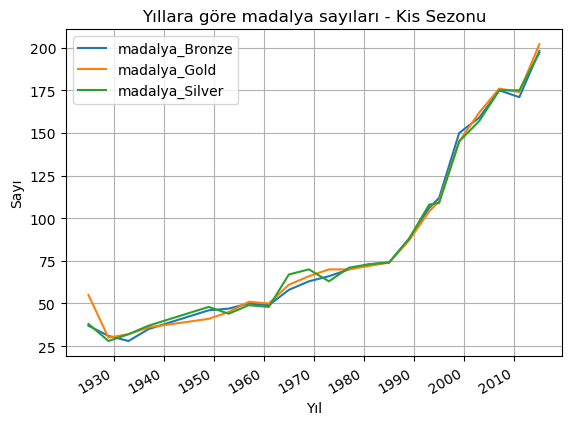

In [118]:
plt.figure()
periyodik_veri_yaz.loc[:,["madalya_Bronze","madalya_Gold","madalya_Silver"]].plot()
plt.title("Yıllara göre madalya sayıları - Yaz Sezonu")
plt.ylabel("Sayı")
plt.xlabel("Yıl")
plt.grid(True)
plt.show()

plt.figure()
periyodik_veri_kis.loc[:,["madalya_Bronze","madalya_Gold","madalya_Silver"]].plot()
plt.title("Yıllara göre madalya sayıları - Kis Sezonu")
plt.ylabel("Sayı")
plt.xlabel("Yıl")
plt.grid(True)
plt.show()